#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Riddhi Bhavesh Mehta - Capstone Report Notebook

## BTech Data Science Roll. No. J030 

## Topic: The Art of Stock Market Investing for Short Term

This report describes my capstone project titled “Stock Market Investment for Short-Term” and my learnings in the same. During the tenure of my semester-long project, I came across various finance terms, stock market specific terms, along with introduction to the algorithms of time-series modelling for price prediction. 

I have also upskilled myself in areas of coding in python, using complex tools on Advanced Excel, creating visualisations on Jupyter Notebook and learning new concepts of Stock Market and Finance industry. With my solid technical foundation in Bachelor of Technology in Data Science, 

I was able to resolve business challenges with my adept hands-on various tools and software. The great learning associated with this capstone project is the way it carved my mind to analyze and create a product from a business standpoint.

As a Data Science student, I have always been taught to commence any project by researching in depth about the topic, existing methods and outcomes, along with understanding its scope for improvement. As a fresher to this domain, it was essential for me to dive into the finance and stock market terms, know the different types of industries, and stock indices, anomalies in the system and the rules and regulations of investing.

Moreover, I have realised that there is never a single dimension solution to complicated problems. I was aware that if I had to create a robust system that would accurately analyse the stock market and accordingly predict the future market movement, then I would have to employ a conglomerate of algorithms and logic. 

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Importing Libraries

In [1]:
import os
import selenium
from selenium import webdriver
import time
from PIL import Image
import io
import requests
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from GoogleNews import GoogleNews
import flair

import numpy as np 
import pandas as pd
import statistics
import more_itertools
import random
from collections import Counter
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
import datetime
from datetime import date
from bs4 import BeautifulSoup # for html parsing and scraping
import bs4
from fastnumbers import isfloat 
import yfinance
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
import math

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers import *

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
from tqdm import tqdm_notebook
import seaborn as sns
import json
from tidylib import tidy_document # for tidying incorrect html

sns.set_style('whitegrid')
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import yfinance as yf # downloading stocks directly

import nltk # for sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Riddhi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Reading Stocks

###### NIFTY 50 STOCKS

In [2]:
nifty50 = pd.read_csv(r"D:\RIDDHI MEHTA\MPSTME\Fourth Year\8th semester\Capstone Project\NIFTY50.csv")
nifty50 = nifty50.sort_values(by = 'Industry')
nifty50

,Symbol,Name of the Company,Industry
31,HEROMOTOCO,Hero MotoCorp Ltd.,AUTOMOBILE
34,TATAMOTORS,Tata Motors Ltd.,AUTOMOBILE
33,MARUTI,Maruti Suzuki India Ltd.,AUTOMOBILE
32,M&M,Mahindra & Mahindra Ltd.,AUTOMOBILE
30,EICHERMOT,Eicher Motors Ltd.,AUTOMOBILE
29,BAJAJ-AUTO,Bajaj Auto Ltd.,AUTOMOBILE
47,ULTRACEMCO,UltraTech Cement Ltd.,CEMENT & CEMENT PRODUCTS
46,SHREECEM,Shree Cement Ltd.,CEMENT & CEMENT PRODUCTS
45,GRASIM,Grasim Industries Ltd.,CEMENT & CEMENT PRODUCTS
35,LT,Larsen & Toubro Ltd.,CONSTRUCTION


###### NIFTY MID CAP 50 STOCKS

In [3]:
niftymid50 = pd.read_csv(r"D:\RIDDHI MEHTA\MPSTME\Fourth Year\8th semester\Capstone Project\NIFTYMID50.csv")
niftymid50 = niftymid50.sort_values(by = 'Industry')
niftymid50

,Symbol,Name of the Company,Industry
2,AMARAJABAT,Amara Raja Batteries Ltd.,AUTOMOBILE
4,APOLLOTYRE,Apollo Tyres Ltd.,AUTOMOBILE
5,BALKRISIND,Balkrishna Industries Ltd.,AUTOMOBILE
18,EXIDEIND,Exide Industries Ltd.,AUTOMOBILE
41,TVSMOTOR,TVS Motor Company Ltd.,AUTOMOBILE
45,RAMCOCEM,The Ramco Cements Ltd.,CEMENT & CEMENT PRODUCTS
12,CENTURYTEX,Century Textile & Industries Ltd.,CEMENT & CEMENT PRODUCTS
42,TATACHEM,Tata Chemicals Ltd.,CHEMICALS
49,VOLTAS,Voltas Ltd.,CONSTRUCTION
17,ENGINERSIN,Engineers India Ltd.,CONSTRUCTION


## Custom Made Definitions

### Date Column Version 1

In [2]:
def date_column (days):
    my_date = []
    today = date.today()
    for i in range (0, days):
        a = 1
        new_date = today + datetime.timedelta(days = a)
        my_date.append(new_date)
        today = new_date
        a += 1
    return list(my_date)

### RMSE

In [3]:
def rmse (y_true, y_pred):
    df = pd.concat([y_true, y_pred], axis = 1)
    df = df.dropna()
    df = df.reset_index()
    df.drop(columns = 'index', inplace = True)
    return (math.sqrt(mean_squared_error(df.iloc[:,0], df.iloc[:,1])))

### Bins Function

Very Important for Final - Prediction

In [4]:
def create_bins(lower_limit, upper_limit):
    bins = list()
    diff = (upper_limit - lower_limit) / 5
    for i in range(1,6):
        b = lower_limit + (diff*i)
        bins.append(b)
    return bins

## QUALITATIVE ANALYSIS - PART 1 OF CAPSTONE PROJECT CODE

### Sentiment Analysis

In [5]:
def sentiment_analysis(df):
    
    output = pd.DataFrame()
    result = str()
    
    for i in range(len(df)):
        row = df.iloc[i,0]
        analysis = pd.DataFrame(sia.polarity_scores(row), index = [0])
        output = pd.concat([output, analysis], axis = 0)
        
    output = output.reset_index()    
    output.drop(columns = 'index', inplace = True)
    output = pd.concat([df, output], axis = 1)
    
    a = -0.7
    b = 0.7
    
    neg = output[output.iloc[:,-1] < a]
    neg_count = len(neg)
    neg = round(neg.iloc[:,-1].mean(),4)
    
    pos = output[output.iloc[:,-1] > b]
    pos_count = len(pos)
    pos = round(pos.iloc[:,-1].mean(),4)
       
    while neg_count == 0 or pos_count == 0:
        
        a = a + 0.1
        b = b - 0.1
        
        if a == -0.4 or b == 0.4:
            neg = 0
            neg_count = 0
            pos = 0
            pos_count = 0
            break
            
        else:
            neg = output[output.iloc[:,-1] < a]
            neg_count = len(neg)
            neg = round(neg.iloc[:,-1].mean(),4)

            pos = output[output.iloc[:,-1] > b]
            pos_count = len(pos)
            pos = round(pos.iloc[:,-1].mean(),4)
            
    print("Final threshold value of a = " + str(a) + " and for b is = " + str(b))
    
    print("Negative mean is = " + str((neg)))
    print("Negative count is = " + str(neg_count))
    print("Positive mean is = " + str(pos))
    print("Positive count is = " + str(pos_count))
        
    final_pos = round(pos*pos_count,4)
    final_neg = round(abs(neg*neg_count),4)
    
    if final_pos == 0 or final_neg == 0:
        result = "NULL"
        print("Analysis not possible due to no concrete sentiment")
        
    else:
        perc = round(pos_count/neg_count,4)

        print("Positive Value = " + str(final_pos) + " and Negative Value = " + str(final_neg))
        print("Positive Negative review ratio is = " + str(perc))

        if perc >= 3.0 and final_pos > final_neg:
            print("Buy Stock as positive:negative ratio is >= to 3 and positive value is MORE than negative value")
            result = "Buy"
        elif perc < 3.0 and final_pos > final_neg:
            print("Hold Stock as positive:negative ratio is <= to 3 but the positive value is MORE than negative value")
            result = "Hold"
        else:
            print("Sell Stock as positive:negative ratio is <= to 3 and positive value is LESSER than negative value")
            result = "Sell"
    
    return result, output

#### Example 1 - Tata Consultancy Services

In [34]:
googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
googlenews.get_news("Tata Consultancy Services stock whether to buy or sell stock?")
my_news = googlenews.get_texts()
my_news = pd.DataFrame(my_news)
if my_news.empty == True:
    print("No concrete news found to analyse, so cannot proceed ahead.")
else:
    result, output = sentiment_analysis(my_news)
    print(result)

Final threshold value of a = -0.7 and for b is = 0.7
Negative mean is = -0.7351
Negative count is = 1
Positive mean is = 0.7633
Positive count is = 9
Positive Value = 6.8697 and Negative Value = 0.7351
Positive Negative review ratio is = 9.0
Buy Stock as positive:negative ratio is >= to 3 and positive value is MORE than negative value
Buy


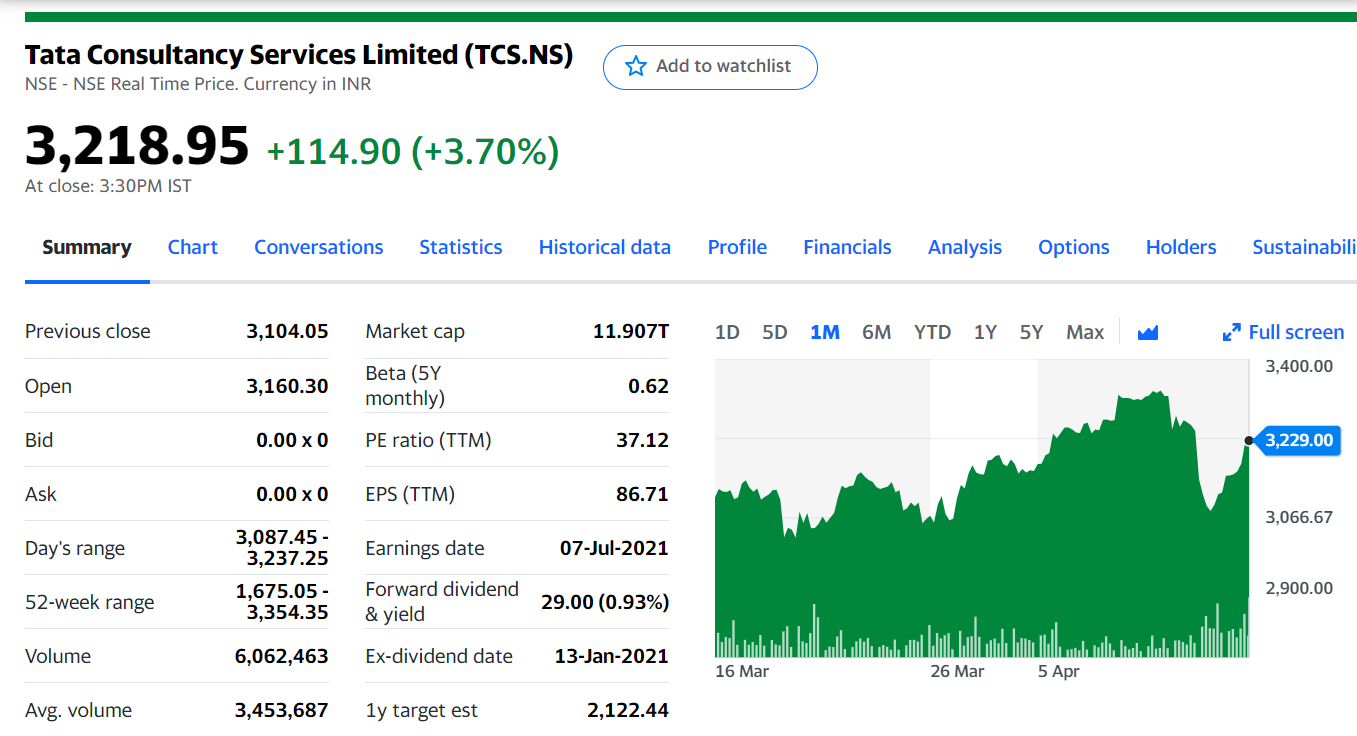

#### Example 2 - Kotak Mahindra Bank Ltd. 

In [39]:
googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
googlenews.get_news("Kotak Mahindra Bank Ltd stock whether to buy or sell stock?")
my_news = googlenews.get_texts()
my_news = pd.DataFrame(my_news)
if my_news.empty == True:
    print("No concrete news found to analyse, so cannot proceed ahead.")
else:
    result, output = sentiment_analysis(my_news)
    print(result)

Final threshold value of a = -0.7 and for b is = 0.7
Negative mean is = -0.7567
Negative count is = 2
Positive mean is = 0.7532
Positive count is = 2
Positive Value = 1.5064 and Negative Value = 1.5134
Positive Negative review ratio is = 1.0
Sell Stock as positive:negative ratio is <= to 3 and positive value is LESSER than negative value
Sell


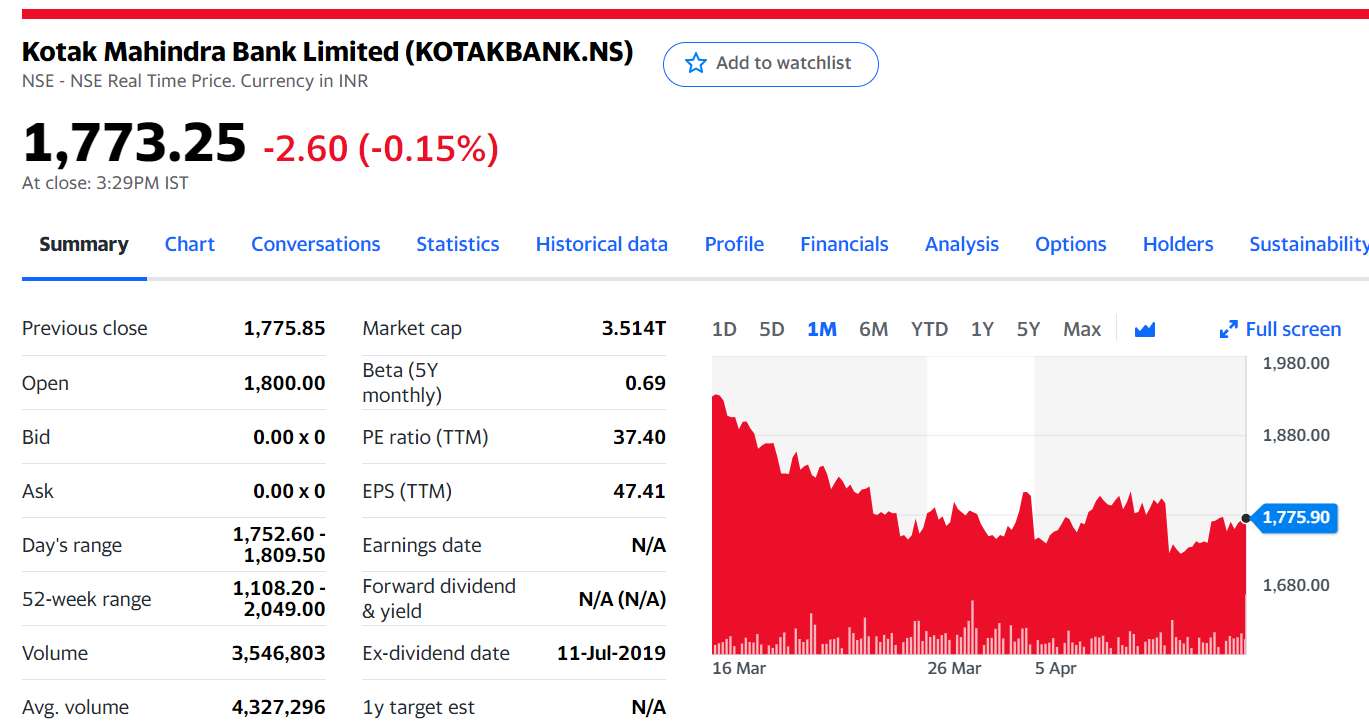

#### Example 3 - SBI Life Insurance Ltd.

In [40]:
googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
googlenews.get_news("SBI Life Insurance stock whether to buy or sell stock?")
my_news = googlenews.get_texts()
my_news = pd.DataFrame(my_news)
if my_news.empty == True:
    print("No concrete news found to analyse, so cannot proceed ahead.")
else:
    result, output = sentiment_analysis(my_news)
    print(result)

Final threshold value of a = -0.7 and for b is = 0.7
Negative mean is = -0.743
Negative count is = 1
Positive mean is = 0.7269
Positive count is = 1
Positive Value = 0.7269 and Negative Value = 0.743
Positive Negative review ratio is = 1.0
Sell Stock as positive:negative ratio is <= to 3 and positive value is LESSER than negative value
Sell


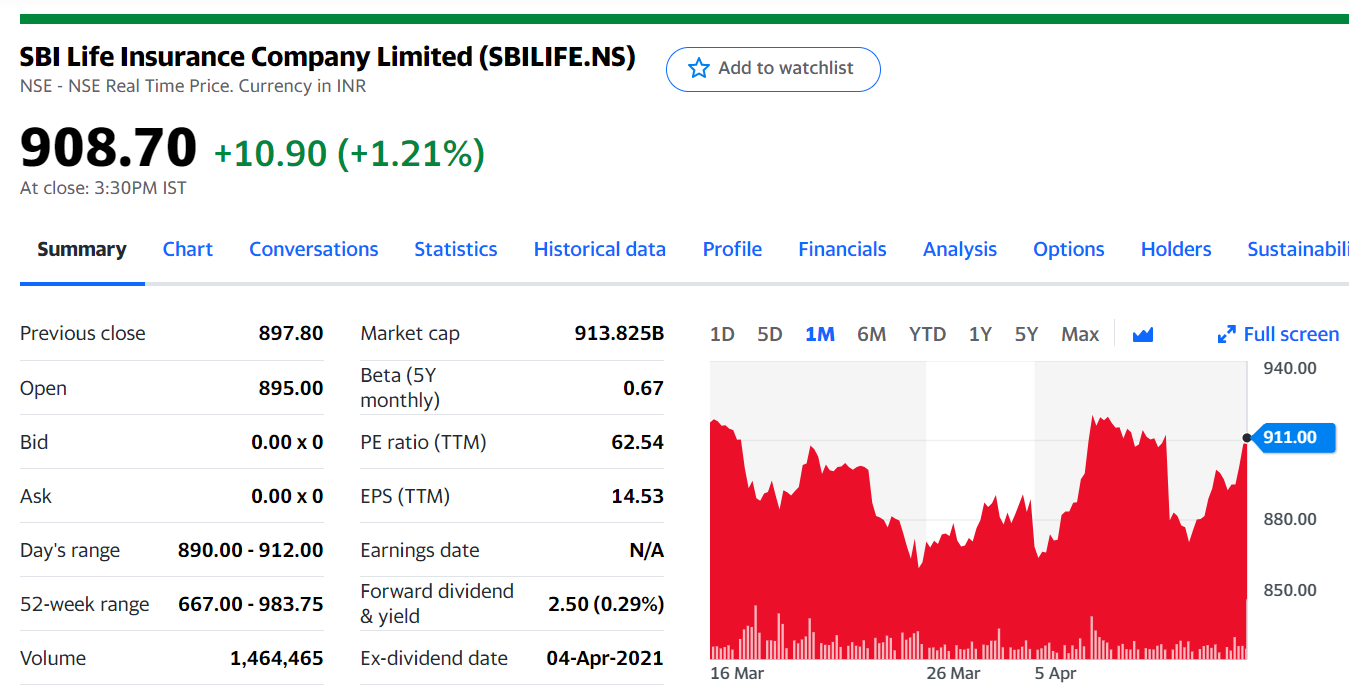

#### Example 4 - Reliance Power Stock

In [38]:
googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
googlenews.get_news("Reliance Power stock whether to buy or sell stock?")
my_news = googlenews.get_texts()
my_news = pd.DataFrame(my_news)
if my_news.empty == True:
    print("No concrete news found to analyse, so cannot proceed ahead.")
else:
    result, output = sentiment_analysis(my_news)
    print(result)

Final threshold value of a = -0.7 and for b is = 0.7
Negative mean is = -0.8481
Negative count is = 1
Positive mean is = 0.8137
Positive count is = 3
Positive Value = 2.4411 and Negative Value = 0.8481
Positive Negative review ratio is = 3.0
Buy Stock as positive:negative ratio is >= to 3 and positive value is MORE than negative value
Buy


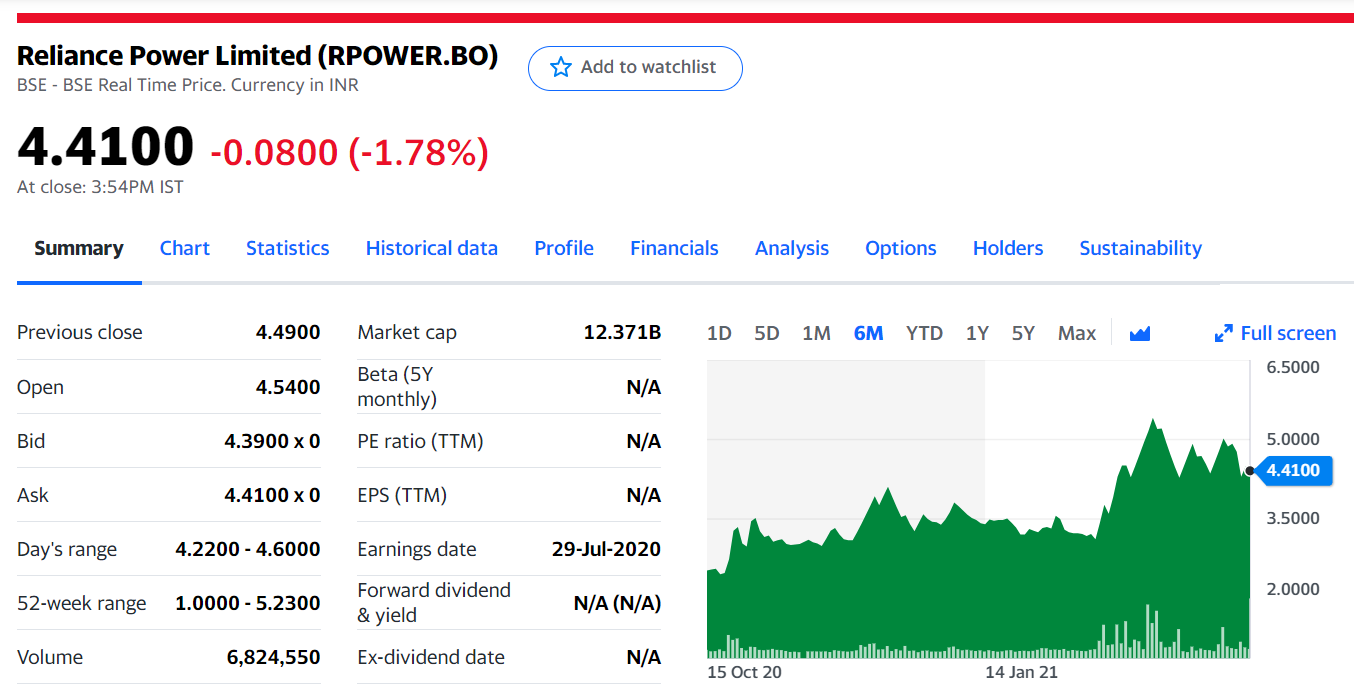

#### Example 5 - Cholamandalam Investment and Finance Company Ltd.

In [36]:
googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
googlenews.get_news("CHOLAFIN stock whether to buy or sell stock?")
my_news = googlenews.get_texts()
my_news = pd.DataFrame(my_news)
if my_news.empty == True:
    print("No concrete news found to analyse, so cannot proceed ahead.")
else:
    result, output = sentiment_analysis(my_news)
    print(result)

Final threshold value of a = -0.4 and for b is = 0.4
Negative mean is = 0
Negative count is = 0
Positive mean is = 0
Positive count is = 0
Analysis not possible due to no concrete sentiment
NULL


#### Example 6 - Jindal Steel & Power Ltd.

In [37]:
googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
googlenews.get_news("JINDALSTL and power stock whether to buy or sell stock?")
my_news = googlenews.get_texts()
my_news = pd.DataFrame(my_news)
if my_news.empty == True:
    print("No concrete news found to analyse, so cannot proceed ahead.")
else:
    result, output = sentiment_analysis(my_news)
    print(result)

No concrete news found to analyse, so cannot proceed ahead.


#### Example 7 - Britannia Industries Ltd.

In [16]:
googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
googlenews.get_news("Britannia Industries Ltd. buy or sell?")
my_news = googlenews.get_texts()
my_news = pd.DataFrame(my_news)
if my_news.empty == True:
    print("No concrete news found to analyse, so cannot proceed ahead.")
else:
    result, output = sentiment_analysis(my_news)
    print(result)

Final threshold value of a = -0.6 and for b is = 0.6
Negative mean is = -0.6806
Negative count is = 2
Positive mean is = 0.7144
Positive count is = 5
Positive Value = 3.572 and Negative Value = 1.3612
Positive Negative review ratio is = 2.5
Hold Stock as positive:negative ratio is <= to 3 but the positive value is MORE than negative value
Hold


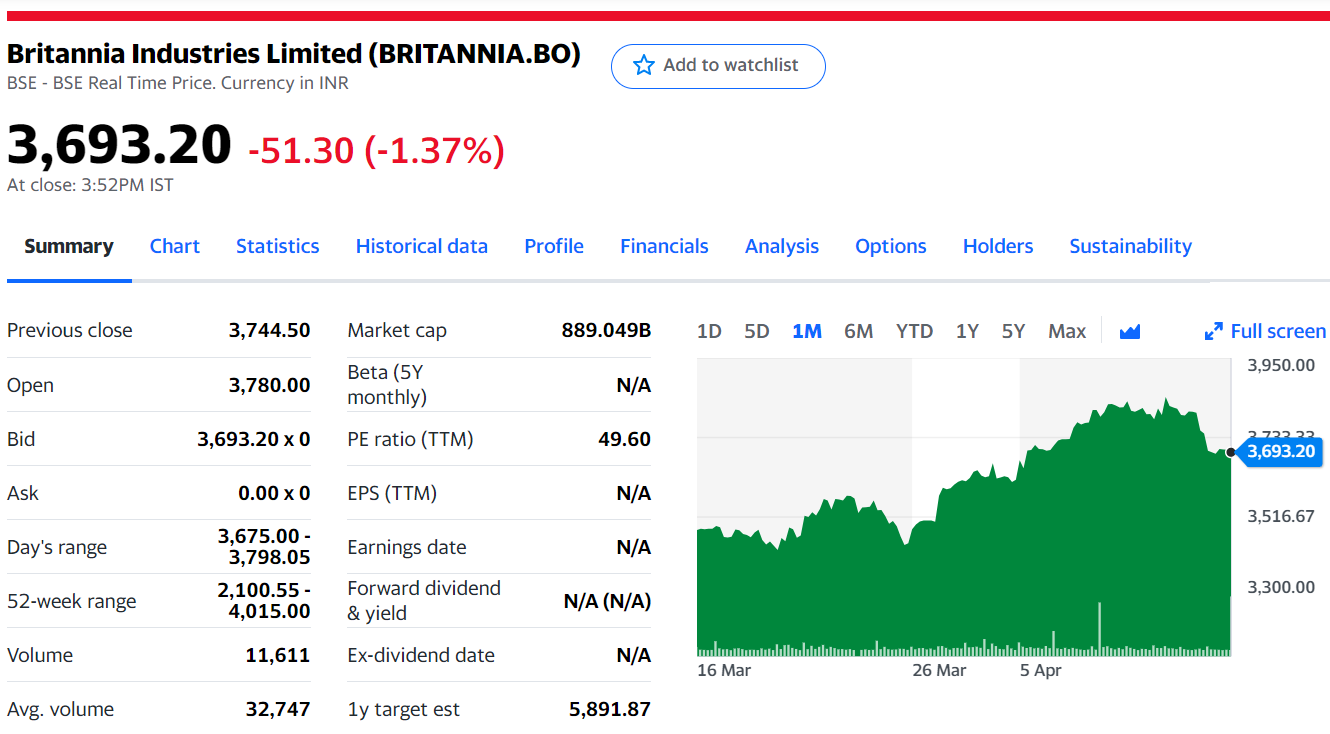

## --------------------------

### !!!!! For Presentation - Live Sentiment Analysis - Just change the string !!!!!

In [6]:
googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
googlenews.get_news("Reliance Industries stock whether to buy or sell stock?")
my_news = googlenews.get_texts()
my_news = pd.DataFrame(my_news)
if my_news.empty == True:
    print("No concrete news found to analyse, so cannot proceed ahead.")
else:
    result, output = sentiment_analysis(my_news)
    print(result)

Final threshold value of a = -0.7 and for b is = 0.7
Negative mean is = -0.8481
Negative count is = 1
Positive mean is = 0.771
Positive count is = 5
Positive Value = 3.855 and Negative Value = 0.8481
Positive Negative review ratio is = 5.0
Buy Stock as positive:negative ratio is >= to 3 and positive value is MORE than negative value
Buy


## --------------------------

### Instant Analysis of all stocks in Nifty 50

In [ ]:
# Nifty 50
stock_names = list()
results = list()

for i in range(0,len(nifty50)):
    
    stock_name = nifty50.iloc[i,1]
    
    my_news = pd.DataFrame()
    my_string = str()
    
    my_string = stock_name + " buy or sell?"
    print(my_string)
    
    googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')    
    googlenews.get_news(my_string)
    my_news = pd.DataFrame(googlenews.get_texts())
    
    result, output = sentiment_analysis(my_news)
    print(result)
    
    stock_names.append(i)
    results.append(result)

nifty50_analysis = pd.DataFrame()
nifty50_analysis['stock_name'] = stock_names
nifty50_analysis['results'] = results

### Instant Analysis of all stocks in Nifty Mid Cap 50

In [ ]:
# Nifty MidCap 50
stock_names = list()
results = list()

for i in range(0,len(niftymid50)):
    
    stock_name = niftymid50.iloc[i,1]
    
    my_news = pd.DataFrame()
    my_string = str()
    
    my_string = stock_name + " buy or sell?"
    print(my_string)
    
    googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')    
    googlenews.get_news(my_string)
    my_news = pd.DataFrame(googlenews.get_texts())
    
    result, output = sentiment_analysis(my_news)
    print(result)
    
    stock_names.append(i)
    results.append(result)

niftymid50_analysis = pd.DataFrame()
niftymid50_analysis['stock_name'] = stock_names
niftymid50_analysis['results'] = results

##### Saving all sentiment analysis to a CSV for future reference...

In [ ]:
nifty50['results'] = nifty50_analysis['results']
niftymid50['results'] = niftymid50_analysis['results']
nifty50.to_csv("D:/RIDDHI MEHTA/MPSTME/Fourth Year/8th semester/Capstone Project/nifty50_analysis.csv", index = False)
niftymid50.to_csv("D:/RIDDHI MEHTA/MPSTME/Fourth Year/8th semester/Capstone Project/niftymid50_analysis.csv", index = False)

## --------------------------

## QUANTITATIVE ANALYSIS - PART 2 OF CAPSTONE PROJECT CODE

### MOVING AVERAGE MODEL

In [7]:
def moving_average(symbol):
    
    print("Stock Analysis for " + symbol)
    symbol = str(str(symbol) + '.NS')
    stock = yf.download(symbol, start = datetime.datetime(2021,1,1), end = date.today(), progress=False)
    stock = stock.reset_index()
    
    # Moving Average Calculation
    stock['short_roll'] = stock.Close.rolling(window=5).mean()
    stock['long_roll'] = stock.Close.rolling(window=20).mean()
    stock['ema_short'] = stock.Close.ewm(span=5, adjust=False).mean()
    stock['ema_long'] = stock.Close.ewm(span=20, adjust=False).mean()
    
    # Visualisation part 1
    ax = stock.plot(x = 'Date', y = 'Close', style='b-', grid=True)
    ax = stock.plot(x = 'Date', y = 'short_roll', style='g-', ax = ax, alpha = 0.3)
    ax = stock.plot(x = 'Date', y = 'long_roll', style='y-', ax = ax, alpha = 0.3)
    ax = stock.plot(x = 'Date', y = 'ema_short', style='p-', ax = ax)
    ax = stock.plot(x = 'Date', y = 'ema_long', style='r-', ax = ax, alpha = 0.3)
    
    # RMSE 
    print('Short-Roll = ' + str(rmse(stock.Close, stock.short_roll)))
    print('Long-Roll = ' + str(rmse(stock.Close, stock.long_roll)))
    print('EMA-Short = ' + str(rmse(stock.Close, stock.ema_short)))
    print('EMA-Long = ' + str(rmse(stock.Close, stock.ema_long)))
    
    # Find out prediction for the next one month
    X = stock.Close.values
    window = 5
    history = list(X[len(X)-window:])
    predictions = list()
    prediction_period = 30 # in days

    # moving average manual function
    for t in range(prediction_period):
        length = len(history)
        yhat = np.mean([history[i] for i in range(length-window,length)])
        predictions.append(yhat)
        history.append(yhat)

    df = pd.DataFrame()
    df['Date'] = date_column(30)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Predictions'] = predictions
    df.dtypes

    # Visualisation part 2
    ax = df.plot(x = 'Date', y = 'Predictions', style='o-', ax = ax)
    
    ax.legend(['train', 'short-roll', 'long-roll', 'ema-short', 'ema-long', 'Predictions'])
    ax.set_xlabel("date")
    ax.set_ylabel("INR")
    
    plt.show()
    
#     return df

#### Example 1 - Asian Paints

Stock Analysis for ASIANPAINT
Short-Roll = 53.773699809257444
Long-Roll = 101.9447762777677
EMA-Short = 41.356465130366786
EMA-Long = 94.45505923718203


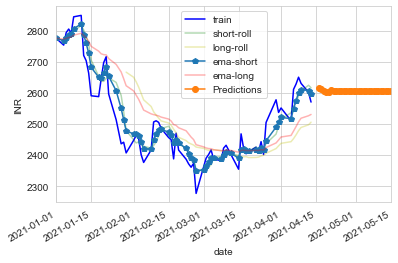

,Date,Predictions
0,2021-04-16,2616.589990
1,2021-04-17,2614.187969
2,2021-04-18,2606.895582
3,2021-04-19,2602.114689
4,2021-04-20,2602.097636
5,2021-04-21,2608.377173
6,2021-04-22,2606.734610
7,2021-04-23,2605.243938
8,2021-04-24,2604.913609
9,2021-04-25,2605.473393


In [43]:
moving_average("ASIANPAINT")

#### Example 2 - ITC

Stock Analysis for ITC
Short-Roll = 4.991431662303043
Long-Roll = 8.350715454881662
EMA-Short = 3.7698397233126575
EMA-Long = 6.427275653704682


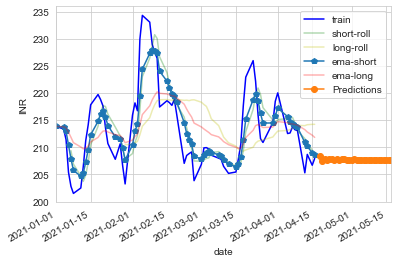

In [8]:
moving_average("ITC")

### ARIMA MODEL

In [9]:
def arima(symbol):
       
    # grid search - manual
    def evaluate_arima(stock, p_values, d_values, q_values):
        best_score, best_cfg = float("inf"), None
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    order = (p,d,q)
                    try:
                        rmse, test = arima_model(stock, order)
                        if rmse < best_score:
                            best_score, best_cfg = rmse, order
#                         print('ARIMA%s RMSE=%.3f' % (order,rmse))
                    except:
                        continue
#         print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
        return best_cfg
    
    # ARIMA Model
    def arima_model(stock, arima_order):
    
        train = pd.DataFrame(stock.loc[:29,('Date','Close')])
        test = pd.DataFrame(stock.loc[30:,('Date','Close')])
        train_data = train.Close.values
        test_data = test.Close.values
        history = list(train_data)
        model_predictions = []
        N_test_observations = len(test_data)
    
        for time_point in range(N_test_observations):
            model = ARIMA(history, order=arima_order)
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0][0]
            model_predictions.append(yhat)
            true_test_value = test_data[time_point]
            history.append(true_test_value)

        rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
#         print('RMSE is = ' + str(rmse))
        test['Predictions'] = model_predictions
        return rmse, test
    
    # Future Prediction using Best ARIMA model 
    def future_arima(stock, best_order):
        
        train = pd.DataFrame(stock.loc[:29,('Date','Close')])
        test = pd.DataFrame(stock.loc[30:,('Date','Close')])
        train_data = train.Close.values
        test_data = test.Close.values
        history = list(train_data)
        model_predictions = []
        days = 30
        for time_point in range(days):
            model = ARIMA(history, order=best_order)
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0][0]
            model_predictions.append(yhat)
            history.append(yhat)
        df = pd.DataFrame()
        df['Date'] = date_column(30)
        df['Date'] = pd.to_datetime(df['Date'])
        df['Predictions'] = model_predictions
        return df
    
    print("Stock Analysis for " + symbol)
    symbol = str(str(symbol) + '.NS')
    stock = yf.download(symbol, start = datetime.datetime(2021,1,1), end = date.today(), progress=False)
    stock = stock.reset_index()
    
    # evaluate parameters
    p = [0, 1, 2, 4, 6]
    d = range(0, 3)
    q = range(0, 3)
    
    best_order = evaluate_arima(stock, p, d, q)
    best_rmse, test = arima_model(stock, best_order)
    df = future_arima(stock, best_order)
    
    # Visualisation
    
    ax = stock.plot(x = 'Date', y = 'Close', style='b-', grid=True)
    ax = test.plot(x = 'Date', y = 'Close', style='g-', ax = ax)
    ax = test.plot(x = 'Date', y = 'Predictions', style='r-', ax = ax)
    ax = df.plot(x = 'Date', y = 'Predictions', style='y-', ax = ax)
    ax.legend(['stock', 'actual', 'predicted', 'future-predictions'])
    ax.set_xlabel("date")
    ax.set_ylabel("INR")
    
    print("Best RMSE = " + str(best_rmse) + " and for order = " + str(best_order))
    
    plt.show()
    
#     return df

#### Example 1 - Asian Paints

Stock Analysis for ASIANPAINT
Best RMSE = 48.1401574607825 and for order = (1, 0, 0)


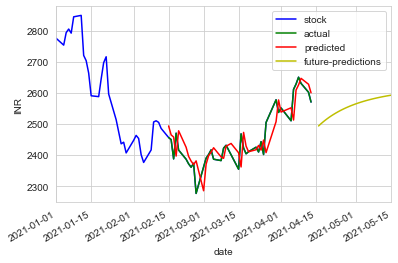

,Date,Predictions
0,2021-04-16,2493.973214
1,2021-04-17,2501.286538
2,2021-04-18,2508.089519
3,2021-04-19,2514.427257
4,2021-04-20,2520.338585
5,2021-04-21,2525.858101
6,2021-04-22,2531.018528
7,2021-04-23,2535.847126
8,2021-04-24,2540.370471
9,2021-04-25,2544.610860


In [10]:
arima("ASIANPAINT")

#### Example 2 - ITC

Stock Analysis for ITC
Best RMSE = 3.2660891096964866 and for order = (2, 0, 0)


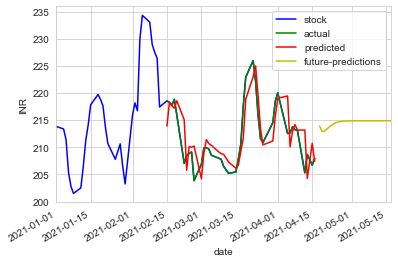

In [10]:
arima("ITC")

### LSTM MODEL

In [11]:
def lstm(symbol):

    print("Stock Analysis for " + symbol)
    symbol = str(str(symbol) + '.NS')
    stock = yf.download(symbol, start = datetime.datetime(2021,1,1), end = date.today(), progress=False)
    stock = stock.reset_index()
    
    train = pd.DataFrame(stock.loc[:29,('Date','Close')])
    test = pd.DataFrame(stock.loc[30:,('Date','Close')])
    train_data = list(train.Close.values)
    train_data = np.reshape(train_data, (-1,1))
    test_data = list(test.Close.values)
    test_data = np.reshape(test_data, (-1,1))
    
    # Feature Scaling
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(train_data)
    
    time_steps = range(1,3)
#     output = range(1,2)
    
    best_rmse = float("inf")
    best_time_steps = int(50)
    best_output = int(50)
    best_df = pd.DataFrame()
    
    print("Entering time_steps loop")
    
    for t in time_steps:    
            
        # Creating a data structure with 10 time-steps and 1 output
        X_train = []
        y_train = []
        for i in range(t, 30): # here 50 is the train test split number
            X_train.append(training_set_scaled[i-t:i, 0])
            y_train.append(training_set_scaled[i, 0])

        X_train, y_train = np.array(X_train), np.array(y_train)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

        #LSTM model begins...
        model = Sequential()

        #Adding the first LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
        model.add(Dropout(0.2))

        # Adding a second LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50, return_sequences = True))
        model.add(Dropout(0.2))

        # Adding a third LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50, return_sequences = True))
        model.add(Dropout(0.2))

        # Adding a fourth LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50))
        model.add(Dropout(0.1))

        # Adding the output layer
        model.add(Dense(units = 1))

        # Compiling the RNN
        model.compile(optimizer = 'adam', loss = 'mean_squared_error')

        # Fitting the RNN to the Training set
        model.fit(X_train, y_train, epochs = 100, batch_size = 8, verbose = 0)


        # prepare x test
        test_data = sc.transform(test_data)
        X_test = []
        for i in range(t, len(stock)-30): ## Here 50 is train test split number
            X_test.append(test_data[i-t:i, 0])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        print(X_test.shape)

        # prediction
        predicted_stock_price = model.predict(X_test)
        predicted_stock_price = sc.inverse_transform(predicted_stock_price)

        dates = list(test.iloc[t:, 0])

        predictions = pd.DataFrame(np.column_stack(list(zip(*predicted_stock_price))), columns=['Predictions'])
        predictions['Date'] = dates
#         print(predictions.shape)

        # Calculating rmse
        ytrue = test.iloc[t:,1]
        ypred = predictions.loc[:,'Predictions']
        ytrue = pd.Series(list(ytrue))
        ypred = pd.Series(list(ypred))
        my_rmse = rmse(ytrue,ypred)
        print("RMSE for current model is = " + str(my_rmse))

        if my_rmse <= best_rmse:
            print("Current model RMSE is the best")
            best_rmse = my_rmse
            best_time_steps = t
            best_df = predictions
            best_test = X_test

            model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
            del model  # deletes the existing model
            print("Model saved, and existing model deleted")

#                 best_output = output
    
    print("Out of the FOR loop now")
    model = load_model('my_model.h5')
    print("Best Model LOADED")
    
    print("Best RMSE is = " + str(best_rmse))
    # Future predicts for 30 days
    abc = best_test[-1]
    print(abc.shape)
    yhats = []
    for i in range(30):
        a = np.reshape(abc, (1, abc.shape[0], 1))
        yhat = model.predict(a)[0][0]
        yhats.append(yhat)
        abc = np.append(abc, yhat)
        abc = np.delete(abc, 0)
        i = i + 1
        
    future_predicts = sc.inverse_transform(np.array(yhats).reshape(-1,1))
    future_predicts_df = pd.DataFrame()
    future_predicts_df['Date'] = date_column(30)
    future_predicts_df['Predictions'] = list(more_itertools.collapse(future_predicts))
    
    # Visualization
    ax = stock.plot(x = 'Date', y = 'Close', style='b-', grid=True)
    ax = best_df.plot(x = 'Date', y = 'Predictions', style='y-', ax = ax)
    ax = future_predicts_df.plot(x = 'Date', y = 'Predictions', style='g-', ax = ax)
    ax.legend(['stock', 'predictions', 'future_predicts'])
    ax.set_xlabel("date")
    ax.set_ylabel("INR")
    plt.show()
    
#     return future_predicts_df

#### Example 1 - Asian Paints

Stock Analysis for ASIANPAINT
Entering time_steps loop
(38, 1, 1)
RMSE for current model is = 48.91184368515194
Current model RMSE is the best
Model saved, and existing model deleted
(37, 2, 1)
RMSE for current model is = 297.6389081136784
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 48.91184368515194
(1, 1)


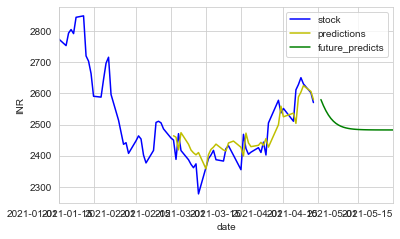

,Date,Predictions
0,2021-04-16,2580.221191
1,2021-04-17,2560.866455
2,2021-04-18,2544.346924
3,2021-04-19,2530.638916
4,2021-04-20,2519.539551
5,2021-04-21,2510.736084
6,2021-04-22,2503.869873
7,2021-04-23,2498.586182
8,2021-04-24,2494.563477
9,2021-04-25,2491.525146


In [23]:
lstm("ASIANPAINT")

#### Example 2 - ITC

Stock Analysis for ITC
Entering time_steps loop
(40, 1, 1)
RMSE for current model is = 3.2709450603648667
Current model RMSE is the best
Model saved, and existing model deleted
(39, 2, 1)
RMSE for current model is = 26.978579021917483
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 3.2709450603648667
(1, 1)


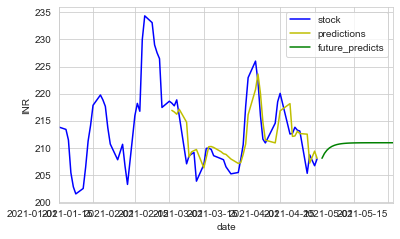

In [12]:
lstm("ITC")

## --------------------------

### !!!!! For Presentation - Live Price Prediction Model - Just uncomment the return statements in all models !!!!!

In [19]:
# moving_average("          WRITE SYMBOL HERE          ")

In [20]:
# arima("          WRITE SYMBOL HERE          ")

In [21]:
# lstm("          WRITE SYMBOL HERE          ")

## --------------------------

# NOVELTY

### Date Column Version 2

In [13]:
def date_column (days):
    my_date = []
    today = datetime.datetime(2021,3,20)
    for i in range (0, days):
        a = 1
        new_date = today + datetime.timedelta(days = a)
        my_date.append(new_date)
        today = new_date
        a += 1
    return list(my_date)

### ARIMA MODEL - Version 2

In [14]:
def arima(symbol):
       
    # grid search - manual
    def evaluate_arima(stock, p_values, d_values, q_values):
        print("inside evaluate arima")
        best_score, best_cfg = float("inf"), None
        for p in p_values:
            for d in d_values:
                for q in q_values:
                    order = (p,d,q)
                    try:
                        rmse, test = arima_model(stock, order)
                        if rmse < best_score:
                            best_score, best_cfg = rmse, order
#                         print('ARIMA%s RMSE=%.3f' % (order,rmse))
                    except:
                        continue
#         print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
        print("outside evaluate arima")
        return best_cfg
    
    # ARIMA Model
    def arima_model(stock, arima_order):
    
#         print("inside arima model")
        train = pd.DataFrame(stock.loc[:29,('Date','Close')])
        test = pd.DataFrame(stock.loc[30:,('Date','Close')])
        train_data = train.Close.values
        test_data = test.Close.values
        history = list(train_data)
        model_predictions = []
        N_test_observations = len(test_data)
    
        for time_point in range(N_test_observations):
            model = ARIMA(history, order=arima_order)
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0][0]
            model_predictions.append(yhat)
            true_test_value = test_data[time_point]
            history.append(true_test_value)

        rmse = math.sqrt(mean_squared_error(test_data, model_predictions))
#         print('RMSE is = ' + str(rmse))
        test['Predictions'] = model_predictions
#         print("outside arima model")
        return rmse, test
    
    # Future Prediction using Best ARIMA model 
    def future_arima(stock, best_order):
        
        print("inside future arima")
        train = pd.DataFrame(stock.loc[:29,('Date','Close')])
        test = pd.DataFrame(stock.loc[30:,('Date','Close')])
        train_data = train.Close.values
        test_data = test.Close.values
        history = list(train_data)
        model_predictions = []
        days = 20
        for time_point in range(days):
            model = ARIMA(history, order=best_order)
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0][0]
            model_predictions.append(yhat)
            history.append(yhat)
        df = pd.DataFrame()
        df['Date'] = date_column(20) # number of days here
        df['Date'] = pd.to_datetime(df['Date'])
        df['Predictions'] = model_predictions
        print("outside future arima")
        return df
    
    print("Stock Analysis for " + symbol)
    symbol = str(str(symbol) + '.NS')
    stock = yf.download(symbol, start = datetime.datetime(2021,1,1), end = datetime.datetime(2021,3,20), progress=False)
    verify = yf.download(symbol, start = datetime.datetime(2021,3,21), end = date.today() , progress=False)
    stock = stock.reset_index()
    verify = verify.reset_index()
    
    # evaluate parameters
    p = [0, 1, 2, 4, 6]
    d = range(0, 3)
    q = range(0, 3)
    
    best_order = evaluate_arima(stock, p, d, q)
    print("evaluate arima successful")
    best_rmse, test = arima_model(stock, best_order)
    print("arima model successful")
    df = future_arima(stock, best_order)
    print("future arima successful")
    print("printing graph")
    
    # Visualisation
    
    ax = stock.plot(x = 'Date', y = 'Close', style='b-', grid=True)
    ax = verify.plot(x = 'Date', y = 'Close', style='g-', ax = ax)
    ax = test.plot(x = 'Date', y = 'Predictions', style='r-', ax = ax)
    ax = df.plot(x = 'Date', y = 'Predictions', style='y-', ax = ax)
    ax.legend(['stock','y_true', 'predicted', 'y_pred'])
    ax.set_xlabel("date")
    ax.set_ylabel("INR")
#     ax = test.plot(x = 'Date', y = 'Close', style='g-', ax = ax)    
    print("Best RMSE = " + str(best_rmse) + " and for order = " + str(best_order))
    
    plt.show()
    
    return df

### LSTM MODEL - Version 2

In [15]:
def lstm(symbol):

    print("Stock Analysis for " + symbol)
    symbol = str(str(symbol) + '.NS')
    stock = yf.download(symbol, start = datetime.datetime(2021,1,1), end = datetime.datetime(2021,3,20), progress=False)
    verify = yf.download(symbol, start = datetime.datetime(2021,3,21), end = date.today() , progress=False)
    stock = stock.reset_index()
    verify = verify.reset_index()
    
    train = pd.DataFrame(stock.loc[:29,('Date','Close')])
    test = pd.DataFrame(stock.loc[30:,('Date','Close')])
    train_data = list(train.Close.values)
    train_data = np.reshape(train_data, (-1,1))
    test_data = list(test.Close.values)
    test_data = np.reshape(test_data, (-1,1))
    
    # Feature Scaling
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(train_data)
    
    time_steps = range(1,3)
#     output = range(1,2)
    
    best_rmse = float("inf")
    best_time_steps = int(50)
    best_output = int(50)
    best_df = pd.DataFrame()
    
    print("Entering time_steps loop")
    
    for t in time_steps:    
            
        # Creating a data structure with 10 time-steps and 1 output
        X_train = []
        y_train = []
        for i in range(t, 30): # here 50 is the train test split number
            X_train.append(training_set_scaled[i-t:i, 0])
            y_train.append(training_set_scaled[i, 0])

        X_train, y_train = np.array(X_train), np.array(y_train)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

        #LSTM model begins...
        model = Sequential()

        #Adding the first LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
        model.add(Dropout(0.2))

        # Adding a second LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50, return_sequences = True))
        model.add(Dropout(0.2))

        # Adding a third LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50, return_sequences = True))
        model.add(Dropout(0.2))

        # Adding a fourth LSTM layer and some Dropout regularisation
        model.add(LSTM(units = 50))
        model.add(Dropout(0.1))

        # Adding the output layer
        model.add(Dense(units = 1))

        # Compiling the RNN
        model.compile(optimizer = 'adam', loss = 'mean_squared_error')

        # Fitting the RNN to the Training set
        model.fit(X_train, y_train, epochs = 100, batch_size = 8, verbose = 0)


        # prepare x test
        test_data = sc.transform(test_data)
        X_test = []
        for i in range(t, len(stock)-30): ## Here 50 is train test split number
            X_test.append(test_data[i-t:i, 0])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        print(X_test.shape)

        # prediction
        predicted_stock_price = model.predict(X_test)
        predicted_stock_price = sc.inverse_transform(predicted_stock_price)

        dates = list(test.iloc[t:, 0])

        predictions = pd.DataFrame(np.column_stack(list(zip(*predicted_stock_price))), columns=['Predictions'])
        predictions['Date'] = dates
#         print(predictions.shape)

        # Calculating rmse
        ytrue = test.iloc[t:,1]
        ypred = predictions.loc[:,'Predictions']
        ytrue = pd.Series(list(ytrue))
        ypred = pd.Series(list(ypred))
        my_rmse = rmse(ytrue,ypred)
        print("RMSE for current model is = " + str(my_rmse))

        if my_rmse <= best_rmse:
            print("Current model RMSE is the best")
            best_rmse = my_rmse
            best_time_steps = t
            best_df = predictions
            best_test = X_test

            model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
            del model  # deletes the existing model
            print("Model saved, and existing model deleted")

#                 best_output = output
    
    print("Out of the FOR loop now")
    model = load_model('my_model.h5')
    print("Best Model LOADED")
    
    print("Best RMSE is = " + str(best_rmse))
    
    # Future predicts for 10 days
    abc = best_test[-1]
    print(abc.shape)
    yhats = []
    for i in range(20):
        a = np.reshape(abc, (1, abc.shape[0], 1))
        yhat = model.predict(a)[0][0]
        yhats.append(yhat)
        abc = np.append(abc, yhat)
        abc = np.delete(abc, 0)
        i = i + 1
        
    future_predicts = sc.inverse_transform(np.array(yhats).reshape(-1,1))
    future_predicts_df = pd.DataFrame()
    future_predicts_df['Date'] = date_column(20)
    future_predicts_df['Predictions'] = list(more_itertools.collapse(future_predicts))
    
    # Visualization
    ax = stock.plot(x = 'Date', y = 'Close', style='b-', grid=True)
    ax = verify.plot(x = 'Date', y = 'Close', style='g-', ax = ax)
    ax = best_df.plot(x = 'Date', y = 'Predictions', style='r-', ax = ax)
    ax = future_predicts_df.plot(x = 'Date', y = 'Predictions', style='y-', ax = ax)
    ax.legend(['stock','y_true','predictions', 'y_pred'])
    ax.set_xlabel("date")
    ax.set_ylabel("INR")
    plt.show()
    
    return future_predicts_df

### Importance of Sentiment - Shocking Result!

Final threshold value of a = -0.7 and for b is = 0.7
Negative mean is = -0.7567
Negative count is = 2
Positive mean is = 0.7532
Positive count is = 2
Positive Value = 1.5064 and Negative Value = 1.5134
Positive Negative review ratio is = 1.0
Sell Stock as positive:negative ratio is <= to 3 and positive value is LESSER than negative value
Sell
ARIMA Analysis for KOTAKBANK
Stock Analysis for KOTAKBANK
inside evaluate arima
outside evaluate arima
evaluate arima successful
arima model successful
inside future arima
outside future arima
future arima successful
printing graph
Best RMSE = 40.666883625125024 and for order = (1, 0, 0)


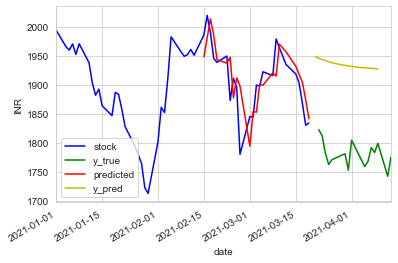

LSTM Analysis for KOTAKBANK
Stock Analysis for KOTAKBANK
Entering time_steps loop
(23, 1, 1)
RMSE for current model is = 40.01872161064695
Current model RMSE is the best
Model saved, and existing model deleted
(22, 2, 1)
RMSE for current model is = 271.9737428704444
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 40.01872161064695
(1, 1)


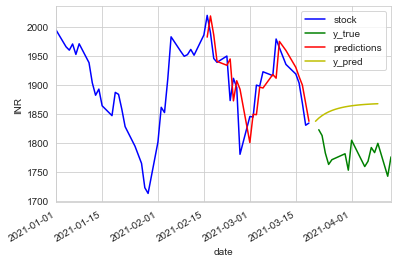

In [9]:
googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
googlenews.get_news("Kotak Mahindra Bank Ltd stock whether to buy or sell stock?")
my_news = googlenews.get_texts()
my_news = pd.DataFrame(my_news)
if my_news.empty == True:
    print("No concrete news found to analyse, so cannot proceed ahead.")
else:
    result, output = sentiment_analysis(my_news)
    print(result)
    
print("ARIMA Analysis for KOTAKBANK")
arima_df = arima("KOTAKBANK")

print("LSTM Analysis for KOTAKBANK")
lstm_df = lstm("KOTAKBANK")

### Price Prediction for the last 15 days and averaging results of ARIMA and LSTM - Shocking Result!

ARIMA Analysis for BIOCON
Stock Analysis for BIOCON
inside evaluate arima
outside evaluate arima
evaluate arima successful
arima model successful
inside future arima
outside future arima
future arima successful
printing graph
Best RMSE = 6.870826097051697 and for order = (1, 0, 0)


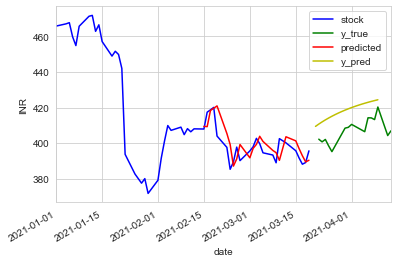

LSTM Analysis for BIOCON
Stock Analysis for BIOCON
Entering time_steps loop
(23, 1, 1)
RMSE for current model is = 6.2822400822799285
Current model RMSE is the best
Model saved, and existing model deleted
(22, 2, 1)
RMSE for current model is = 53.90174223400448
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 6.2822400822799285
(1, 1)


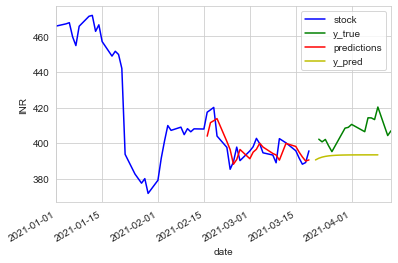

In [11]:
print("ARIMA Analysis for BIOCON")
arima_df = arima("BIOCON")

print("LSTM Analysis for BIOCON")
lstm_df = lstm("BIOCON")

In [13]:
stock_symbol = "BIOCON"
my_df = pd.concat([arima_df, lstm_df["Predictions"]], axis = 1)
my_df.set_axis(["Date", "ARIMA", "LSTM"], axis = 1)

my_df["Average"] = (my_df["ARIMA"] + my_df["LSTM"])/2

verify = yf.download(stock_symbol + '.NS', start = datetime.datetime(2021,3,21), end = date.today(),progress=False)
verify = verify.reset_index()
verify = verify.loc[:,('Date', 'Close')]

my_df = pd.merge(my_df, verify, how='inner', on = 'Date')
print(my_df)
arima_rmse, lstm_rmse, avg_rmse = rmse(my_df.Close, my_df.ARIMA), rmse(my_df.Close, my_df.LSTM),rmse(my_df.Close, my_df.Average)

print("ARIMA RMSE = " + str(arima_rmse))
print("LSTM RMSE = " + str(lstm_rmse))
print("AVERAGE RMSE = " + str(avg_rmse))

         Date       ARIMA        LSTM     Average       Close
0  2021-03-22  410.724635  391.546387  401.135511  402.250000
1  2021-03-23  411.933377  392.173553  402.053465  400.750000
2  2021-03-24  413.065711  392.591675  402.828693  402.100006
3  2021-03-25  414.127759  392.871765  403.499762  398.500000
4  2021-03-26  415.124872  393.060028  404.092450  395.250000
5  2021-03-30  418.556720  393.369171  405.962946  408.450012
6  2021-03-31  419.294915  393.395538  406.345227  408.899994
7  2021-04-01  419.991816  393.413391  406.702603  410.549988
8  2021-04-05  422.419170  393.442871  407.931020  406.450012
9  2021-04-06  422.947377  393.445404  408.196390  414.250000
10 2021-04-07  423.448107  393.447113  408.447610  414.200012
11 2021-04-08  423.923026  393.448242  408.685634  413.250000
12 2021-04-09  424.373730  393.449036  408.911383  420.299988
ARIMA RMSE = 11.774855716168751
LSTM RMSE = 15.743789976604665
AVERAGE RMSE = 5.237709437899048


ARIMA Analysis for UPL
Stock Analysis for UPL
inside evaluate arima
outside evaluate arima
evaluate arima successful
arima model successful
inside future arima
outside future arima
future arima successful
printing graph
Best RMSE = 15.342532095598422 and for order = (1, 1, 0)


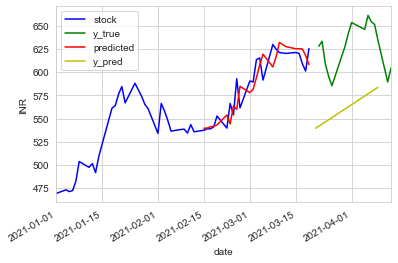

LSTM Analysis for UPL
Stock Analysis for UPL
Entering time_steps loop
(23, 1, 1)
RMSE for current model is = 19.22817530473528
Current model RMSE is the best
Model saved, and existing model deleted
(22, 2, 1)
RMSE for current model is = 229.68696691061953
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 19.22817530473528
(1, 1)


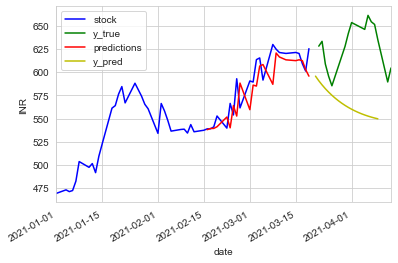

         Date       ARIMA        LSTM     Average       Close
0  2021-03-22  541.726228  590.838562  566.282395  628.150024
1  2021-03-23  544.089341  586.352722  565.221032  633.349976
2  2021-03-24  546.415527  582.273376  564.344452  608.849976
3  2021-03-25  548.747171  578.553162  563.650166  595.650024
4  2021-03-26  551.077980  575.154602  563.116291  585.400024
5  2021-03-30  560.401656  564.240967  562.321312  627.950012
6  2021-03-31  562.732568  562.079773  562.406171  641.849976
7  2021-04-01  565.063475  560.111816  562.587646  653.599976
8  2021-04-05  574.387080  553.896362  564.141721  646.250000
9  2021-04-06  576.717976  552.694397  564.706186  661.349976
10 2021-04-07  579.048870  551.610535  565.329702  654.450012
11 2021-04-08  581.379760  550.634827  566.007293  651.599976
12 2021-04-09  583.710655  549.757568  566.734112  634.900024
ARIMA RMSE = 71.7565049179758
LSTM RMSE = 74.53498099555735
AVERAGE RMSE = 71.72010912566795


In [25]:
print("ARIMA Analysis for UPL")
arima_df = arima("UPL")

print("LSTM Analysis for UPL")
lstm_df = lstm("UPL")

stock_symbol = "UPL"
my_df = pd.concat([arima_df, lstm_df["Predictions"]], axis = 1)
my_df.set_axis(["Date", "ARIMA", "LSTM"], axis = 1)

my_df["Average"] = (my_df["ARIMA"] + my_df["LSTM"])/2

verify = yf.download(stock_symbol + '.NS', start = datetime.datetime(2021,3,21), end = date.today(),progress=False)
verify = verify.reset_index()
verify = verify.loc[:,('Date', 'Close')]

my_df = pd.merge(my_df, verify, how='inner', on = 'Date')
print(my_df)
arima_rmse, lstm_rmse, avg_rmse = rmse(my_df.Close, my_df.ARIMA), rmse(my_df.Close, my_df.LSTM),rmse(my_df.Close, my_df.Average)

print("ARIMA RMSE = " + str(arima_rmse))
print("LSTM RMSE = " + str(lstm_rmse))
print("AVERAGE RMSE = " + str(avg_rmse))

## --------------------------

# FINAL PREDICTION MODEL
##### COMPLETE PRODUCT

In [16]:
def final_prediction(stock_symbol, news_string):
    
    arima_df = arima(stock_symbol)
    lstm_df = lstm(stock_symbol)
    
    my_df = pd.concat([arima_df, lstm_df["Predictions"]], axis = 1)
    my_df.set_axis(["Date", "ARIMA", "LSTM"], axis = 1)
    
    my_df["Average"] = (my_df["ARIMA"] + my_df["LSTM"])/2
    
    verify = yf.download(stock_symbol + '.NS', start = datetime.datetime(2021,3,21), end = date.today(),progress=False)
    verify = verify.reset_index()
    verify = verify.loc[:,('Date', 'Close')]
    
    my_df = pd.merge(my_df, verify, how='inner', on = 'Date')
    print(my_df)
    arima_rmse, lstm_rmse, avg_rmse = rmse(my_df.Close, my_df.ARIMA), rmse(my_df.Close, my_df.LSTM),rmse(my_df.Close, my_df.Average)
    
    print("ARIMA RMSE = " + str(arima_rmse))
    print("LSTM RMSE = " + str(lstm_rmse))
    print("AVERAGE RMSE = " + str(avg_rmse))
    
    # Sentiment Analysis begins...
    
    googlenews = GoogleNews(lang = 'en', period='50d', encode='utf-8')
#     my_string = stock_symbol + " buy or sell?"
    my_string = news_string
    print("Doing sentiment analysis:")
    print(my_string)
    googlenews.get_news(my_string)
    my_news = googlenews.get_texts()
    my_news = pd.DataFrame(my_news)
    if my_news.empty == True:
        print("No news found, so cannot proceed ahead.")
        return
    result, output = sentiment_analysis(my_news)
    
    print("Sentiment analysis is = " + str(result))
    
    # Finding best model for this stock...
    
    min_rmse = int()
    if arima_rmse < lstm_rmse and arima_rmse < avg_rmse:
        min_rmse = arima_rmse
        print("Minimum RMSE is ARIMA RMSE")
        my_df1 = my_df.loc[:,('Date','ARIMA', 'Close')]
    elif lstm_rmse < arima_rmse and lstm_rmse < avg_rmse:
        min_rmse = lstm_rmse
        print("Minimum RMSE is LSTM RMSE")
        my_df1 = my_df.loc[:,('Date','LSTM', 'Close')]
    else:
        min_rmse = avg_rmse
        print("Minimum RMSE is AVERAGE RMSE")
        my_df1 = my_df.loc[:,('Date','Average', 'Close')]
        
    print(my_df1)
    
    # Calculating returns, plotting graph and average returns now of selected dataframe:
    
    daily_returns = my_df1.iloc[:,1].pct_change()
    daily_returns_avg = round((pd.DataFrame(daily_returns).iloc[:,0]).mean(),3)
    print("Daily Returns Average = " + str(daily_returns_avg))
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
    ax1.plot(daily_returns)
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Percent")
    ax1.set_title("Daily returns data")
    plt.show()

    # Final Conditions
    
    if abs(daily_returns_avg) == 0 and result == 'Sell':
        print("Sell Stock as Negative Sentiment, but be informed that there is zero Predicted Daily Returns")
        print("Confidence Level = 50%")
        
    if abs(daily_returns_avg) == 0 and result == 'Buy':
        print("Buy Stock as Positive Sentiment, but be informed that there is zero Predicted Daily Returns")
        print("Confidence Level = 50%")
    
    if result == 'Sell' and daily_returns_avg < 0:
        print("Sell Stock because Negative Sentiment as well as Negative Predicted Daily Returns")
        print("Confidence Level = 90%")
        
    if result == 'Buy' and daily_returns_avg > 0:
        print("Buy Stock because Positive Sentiment as well as Positive Predicted Daily Returns")
        print("Confidence Level = 90%")
        
    if result == 'Hold' and daily_returns_avg < 0:
        print("Hold Stock because Neutral Sentiment but Negative Predicted Daily Returns")
        print("Confidence Level = 70%")
        
    if result == 'Hold' and daily_returns_avg > 0:
        print("Hold Stock because Neutral Sentiment but Positive Predicted Daily Returns")
        print("Confidence Level = 70%")
    
    if result == 'Sell' and daily_returns_avg > 0:
        my_rmse = list()
        for i in range (len(my_df1)):
            my_rmse.append(rmse(pd.Series(my_df1.iloc[i,2]), pd.Series(my_df1.iloc[i,1])))
#         my_rmse = list(my_rmse)
        my_df1['RMSE_row_wise'] = my_rmse
        print(my_df1)
        print("BEFORE SORTING")
        print(my_rmse)
        # Sorting the list of rmse from ascending order 
        my_rmse.sort()
        print("AFTER SORTING")
        print(my_rmse)
        
        # Median and Median Index
        median = statistics.median(my_rmse)
        median_index = my_rmse.index(median)
        print("Median Index is = " + str(median_index))
        
        # Extracting group indices
        indices = list(range(0, median_index))
        print("Indices for Group 1 is below:")
        print(indices)
        avg1 = my_rmse[0:median_index]
        avg1 = round(statistics.mean(avg1),2)
        print("Group1 Average is = " + str(avg1))
        indices = list(range(median_index, len(my_rmse)))
        print("Indices for Group 2 is below:")
        print(indices)
        avg2 = my_rmse[median_index+1:]
        avg2 = round(statistics.mean(avg2),2)
        print("Group2 Average is = " + str(avg2))
        
        # Creating bins
        my_bins = create_bins(avg1, avg2)
        print("Created bins are  = " + str(my_bins))
        
        if median > my_bins[0]:
            if median > my_bins[1]:
                if median > my_bins[2]:
                    if median > my_bins[3]:
                        print("The median is more than the value = " + str(my_bins[3]) + " at 90% confidence level")
                        print("So, with 90% confidence level, sell your stock even though daily returns average is Positive")     
                    else:
                        print("The median is lesser than the value = " + str(my_bins[3]) + " at 70% confidence level")
                        print("So, with 70% confidence level, sell your stock even though daily returns average is Positive")
                else:                    
                    print("The median is lesser than the value = " + str(my_bins[2]) + " at 50% confidence level")
                    print("So, with 50% confidence level, sell your stock even though daily returns average is Positive")
            else:
                print("The median is lesser than the value = " + str(my_bins[1]) + " at 30% confidence level")
                print("So, with 30% confidence level, sell your stock even though daily returns average is Positive")        
        else:
            print("The median is lesser than the value = " + str(my_bins[0]) + " at 10% confidence level")
            print("So, with 10% confidence level, sell your stock even though daily returns average is Positive") 
        
        
    if result == 'Buy' and daily_returns_avg < 0:
        my_rmse = list()
        for i in range (len(my_df1)):
            my_rmse.append(rmse(pd.Series(my_df1.iloc[i,2]), pd.Series(my_df1.iloc[i,1])))
        my_df1['RMSE_row_wise'] = my_rmse
        print(my_df1)
        print("BEFORE SORTING")
        print(my_rmse)
        print("AFTER SORTING")
        my_rmse.sort()
        print(my_rmse)

        median = statistics.median(my_rmse)
        median_index = my_rmse.index(median)
        print("Median is = " + str(median) + " and median index is = " + str(median_index))
        
        indices = list(range(0, median_index))
        avg1 = my_rmse[0:median_index]
        avg1 = round(statistics.mean(avg1),2)
        print("Group 1 indices are " + str(indices) + " and the average of group 1 = "+ str(avg1))
        
        indices = list(range(median_index, len(my_rmse)))
        avg2 = my_rmse[median_index+1:]
        avg2 = round(statistics.mean(avg2),2)
        print("Group 2 indices are " + str(indices) + " and the average of group 2 = "+ str(avg2))
        
        # Creating bins
        my_bins = create_bins(avg1, avg2)
        print("Created bins are  = " + str(my_bins))
        if median > my_bins[0]:
            if median > my_bins[1]:
                if median > my_bins[2]:
                    if median > my_bins[3]:
                        print("The median is more than the value = " + str(my_bins[3]) + " at 90% confidence level")
                        print("So, with 90% confidence level, buy your stock even though daily returns average is Negative")     
                    else:
                        print("The median is lesser than the value = " + str(my_bins[3]) + " at 70% confidence level")
                        print("So, with 70% confidence level, buy your stock even though daily returns average is Negative")
                else:                    
                    print("The median is lesser than the value = " + str(my_bins[2]) + " at 50% confidence level")
                    print("So, with 50% confidence level, buy your stock even though daily returns average is Negative")
            else:
                print("The median is lesser than the value = " + str(my_bins[1]) + " at 30% confidence level")
                print("So, with 30% confidence level, buy your stock even though daily returns average is Negative")        
        else:
            print("The median is lesser than the value = " + str(my_bins[0]) + " at 10% confidence level")
            print("So, with 10% confidence level, buy your stock even though daily returns average is Negative") 
        
        
    if result == 'NULL' and daily_returns_avg > 0:
        print("No concrete analysis can be done on the stock sentiment however there is Positive Predicted Daily Returns")
        print("With 50% confidence, you can go ahead to buy the stock")
              
    if result == 'NULL' and daily_returns_avg < 0:
        print("No concrete analysis can be done on the stock sentiment however there is Negative Predicted Daily Returns")
        print("With 50% confidence, you can go ahead to sell the stock")   
    

### Example 1 - APOLLO TYRES LTD.

Stock Analysis for APOLLOTYRE
inside evaluate arima
outside evaluate arima
evaluate arima successful
arima model successful
inside future arima
outside future arima
future arima successful
printing graph
Best RMSE = 7.006846505037824 and for order = (1, 0, 0)


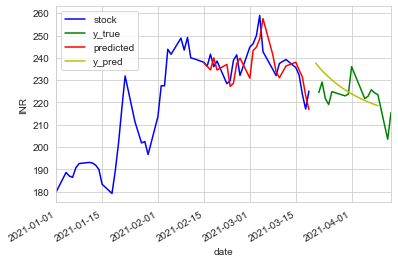

Stock Analysis for APOLLOTYRE
Entering time_steps loop
(23, 1, 1)
RMSE for current model is = 7.189261273030674
Current model RMSE is the best
Model saved, and existing model deleted
(22, 2, 1)
RMSE for current model is = 98.7394430038211
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 7.189261273030674
(1, 1)


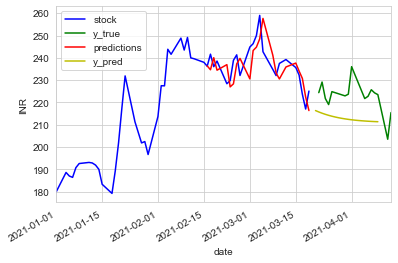

         Date       ARIMA        LSTM     Average       Close
0  2021-03-22  235.941654  215.736221  225.838938  224.399994
1  2021-03-23  234.312422  215.174896  224.743659  229.149994
2  2021-03-24  232.799962  214.671692  223.735827  221.750000
3  2021-03-25  231.393779  214.222214  222.807997  219.050003
4  2021-03-26  230.084591  213.822052  221.953322  224.850006
5  2021-03-30  225.665755  212.629730  219.147743  222.949997
6  2021-03-31  224.734055  212.414337  218.574196  223.699997
7  2021-04-01  223.861047  212.225143  218.043095  236.050003
8  2021-04-05  220.873504  211.675629  216.274566  221.750000
9  2021-04-06  220.235236  211.578583  215.906909  222.750000
10 2021-04-07  219.634428  211.493896  215.564162  225.699997
11 2021-04-08  219.068538  211.420044  215.244291  224.300003
12 2021-04-09  218.535127  211.355698  214.945412  223.500000
ARIMA RMSE = 7.414376894081884
LSTM RMSE = 12.42940766174145
AVERAGE RMSE = 7.583652206460875
Doing sentiment analysis:
Apollo Tyres

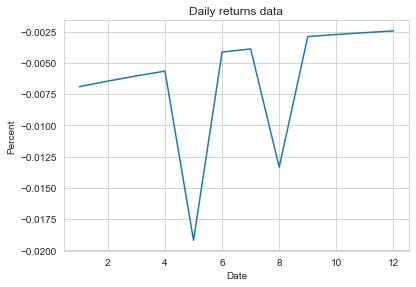

Sell Stock because Negative Sentiment as well as Negative Predicted Daily Returns
Confidence Level = 90%


In [11]:
final_prediction("APOLLOTYRE", "Apollo Tyres stock whether to buy or sell stock?")

### Example 2 - BHARAT PETROLEUM CORPORATION LTD.

Stock Analysis for BPCL
inside evaluate arima
outside evaluate arima
evaluate arima successful
arima model successful
inside future arima
outside future arima
future arima successful
printing graph
Best RMSE = 10.894819973215263 and for order = (0, 1, 0)


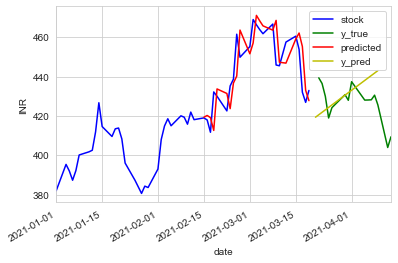

Stock Analysis for BPCL
Entering time_steps loop
(23, 1, 1)
RMSE for current model is = 11.074783030832112
Current model RMSE is the best
Model saved, and existing model deleted
(22, 2, 1)
RMSE for current model is = 93.09833508323499
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 11.074783030832112
(1, 1)


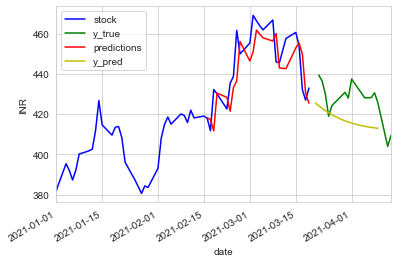

         Date       ARIMA        LSTM     Average       Close
0  2021-03-22  420.593109  424.108307  422.350708  439.350006
1  2021-03-23  421.839661  422.865570  422.352615  436.500000
2  2021-03-24  423.086212  421.719269  422.402740  429.950012
3  2021-03-25  424.332764  420.665497  422.499130  418.950012
4  2021-03-26  425.579315  419.700317  422.639816  424.200012
5  2021-03-30  430.565521  416.639557  423.602539  430.799988
6  2021-03-31  431.812073  416.051300  423.931686  427.950012
7  2021-04-01  433.058624  415.524139  424.291382  437.399994
8  2021-04-05  438.044830  413.930908  425.987869  428.049988
9  2021-04-06  439.291382  413.638947  426.465164  428.100006
10 2021-04-07  440.537933  413.381317  426.959625  428.200012
11 2021-04-08  441.784485  413.154358  427.469421  430.549988
12 2021-04-09  443.031036  412.954803  427.992920  425.600006
ARIMA RMSE = 10.691390348539054
LSTM RMSE = 13.644852457423251
AVERAGE RMSE = 7.964255897808254
Doing sentiment analysis:
Bharat Pet

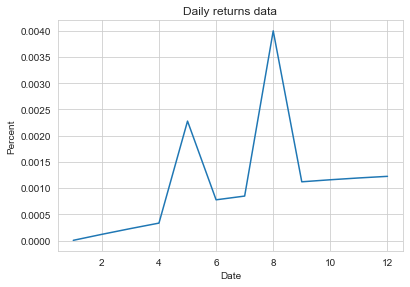

Hold Stock because Neutral Sentiment but Positive Predicted Daily Returns
Confidence Level = 70%


In [12]:
final_prediction("BPCL", "Bharat Petroleum Corp stock whether to buy or sell stock?")

### Example 3 - DR. REDDYS LABORATORIES LTD.

Stock Analysis for DRREDDY
inside evaluate arima
outside evaluate arima
evaluate arima successful
arima model successful
inside future arima
outside future arima
future arima successful
printing graph
Best RMSE = 80.2033001841625 and for order = (0, 1, 0)


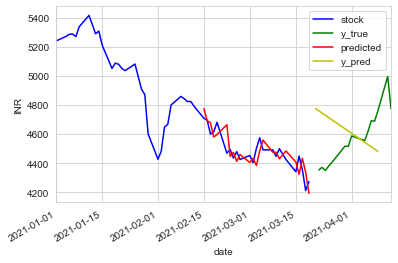

Stock Analysis for DRREDDY
Entering time_steps loop
(23, 1, 1)
RMSE for current model is = 148.49745865168882
Current model RMSE is the best
Model saved, and existing model deleted
(22, 2, 1)
RMSE for current model is = 324.4474672415123
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 148.49745865168882
(1, 1)


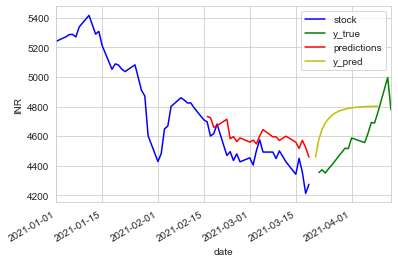

         Date        ARIMA         LSTM      Average        Close
0  2021-03-22  4761.010338  4576.564941  4668.787640  4353.950195
1  2021-03-23  4745.515507  4645.365234  4695.440371  4372.250000
2  2021-03-24  4730.020676  4689.603516  4709.812096  4350.500000
3  2021-03-25  4714.525845  4719.734863  4717.130354  4380.549805
4  2021-03-26  4699.031014  4741.034668  4720.032841  4406.000000
5  2021-03-30  4637.051690  4782.843750  4709.947720  4518.200195
6  2021-03-31  4621.556860  4787.740234  4704.648547  4516.000000
7  2021-04-01  4606.062029  4791.483887  4698.772958  4587.649902
8  2021-04-05  4544.082705  4799.604980  4671.843843  4556.600098
9  2021-04-06  4528.587874  4800.629395  4664.608634  4619.250000
10 2021-04-07  4513.093043  4801.423828  4657.258435  4692.649902
11 2021-04-08  4497.598212  4802.040039  4649.819125  4689.049805
12 2021-04-09  4482.103381  4802.519043  4642.311212  4760.299805
ARIMA RMSE = 252.1811136118523
LSTM RMSE = 243.404273484667
AVERAGE RMSE = 2

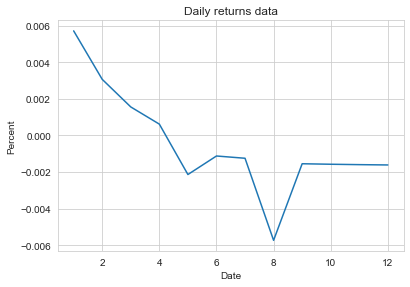

Buy Stock as Positive Sentiment, but be informed that there is zero Predicted Daily Returns
Confidence Level = 50%


In [13]:
final_prediction("DRREDDY", "Dr Reddys Labs stock whether to buy or sell stock?")

### Example 4 - HERO MOTOCORP LTD.

Stock Analysis for HEROMOTOCO
inside evaluate arima
outside evaluate arima
evaluate arima successful
arima model successful
inside future arima
outside future arima
future arima successful
printing graph
Best RMSE = 76.32344849979613 and for order = (1, 0, 0)


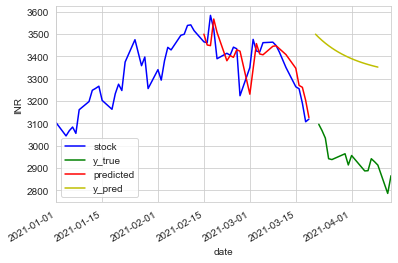

Stock Analysis for HEROMOTOCO
Entering time_steps loop
(23, 1, 1)
RMSE for current model is = 77.28971800358661
Current model RMSE is the best
Model saved, and existing model deleted
(22, 2, 1)
RMSE for current model is = 718.2524205156235
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 77.28971800358661
(1, 1)


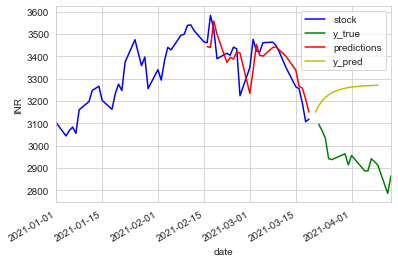

         Date        ARIMA         LSTM      Average        Close
0  2021-03-22  3485.050412  3179.580566  3332.315489  3095.850098
1  2021-03-23  3471.622185  3200.591553  3336.106869  3067.449951
2  2021-03-24  3459.302738  3216.150146  3337.726442  3033.850098
3  2021-03-25  3447.981935  3227.939697  3337.960816  2941.649902
4  2021-03-26  3437.565834  3237.023926  3337.294880  2937.800049
5  2021-03-30  3403.376951  3257.651611  3330.514281  2963.850098
6  2021-03-31  3396.383564  3260.481934  3328.432749  2913.600098
7  2021-04-01  3389.904705  3262.757812  3326.331259  2956.100098
8  2021-04-05  3368.349410  3268.251221  3318.300315  2886.899902
9  2021-04-06  3363.878147  3269.041748  3316.459947  2887.949951
10 2021-04-07  3359.718053  3269.684082  3314.701068  2941.600098
11 2021-04-08  3355.843265  3270.206543  3313.024904  2928.000000
12 2021-04-09  3352.234060  3270.631592  3311.432826  2912.899902
ARIMA RMSE = 449.4114463440632
LSTM RMSE = 300.45209758308823
AVERAGE RMSE =

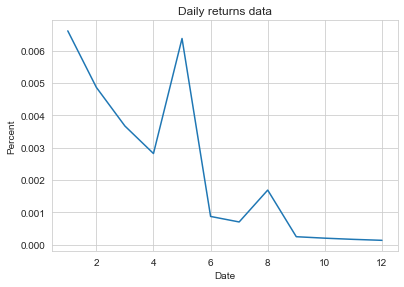

Buy Stock because Positive Sentiment as well as Positive Predicted Daily Returns
Confidence Level = 90%


In [14]:
final_prediction("HEROMOTOCO", "Hero Motocorp stock whether to buy or sell stock?")

### Example 5 - INFOSYS LTD.

Stock Analysis for INFY
inside evaluate arima
outside evaluate arima
evaluate arima successful
arima model successful
inside future arima
outside future arima
future arima successful
printing graph
Best RMSE = 16.855757205026404 and for order = (2, 1, 2)


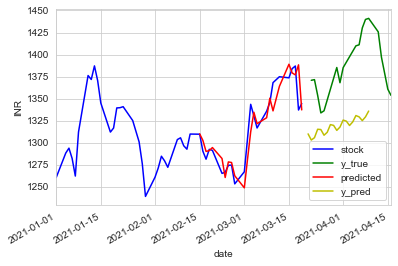

Stock Analysis for INFY
Entering time_steps loop
(23, 1, 1)
RMSE for current model is = 20.739952247950587
Current model RMSE is the best
Model saved, and existing model deleted
(22, 2, 1)
RMSE for current model is = 95.49603686398407
Out of the FOR loop now
Best Model LOADED
Best RMSE is = 20.739952247950587
(1, 1)


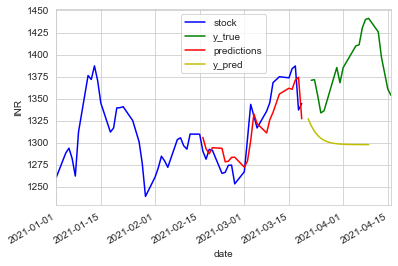

         Date        ARIMA         LSTM      Average        Close
0  2021-03-22  1303.003712  1319.145874  1311.074793  1370.800049
1  2021-03-23  1305.673325  1312.928589  1309.300957  1371.550049
2  2021-03-24  1315.254721  1308.320801  1311.787761  1353.750000
3  2021-03-25  1314.927664  1305.014771  1309.971217  1333.800049
4  2021-03-26  1308.472335  1302.699219  1305.585777  1336.199951
5  2021-03-30  1313.989387  1298.800781  1306.395084  1385.300049
6  2021-03-31  1317.737999  1298.473633  1308.105816  1368.050049
7  2021-04-01  1325.684362  1298.255493  1311.969928  1385.199951
8  2021-04-05  1330.794213  1297.908081  1314.351147  1409.900024
9  2021-04-06  1329.296974  1297.880005  1313.588490  1411.050049
10 2021-04-07  1325.055992  1297.861328  1311.458660  1430.199951
11 2021-04-08  1329.295094  1297.848877  1313.571985  1439.849976
12 2021-04-09  1335.869561  1297.840698  1316.855130  1441.050049
ARIMA RMSE = 73.37125932606035
LSTM RMSE = 93.45425372985497
AVERAGE RMSE = 

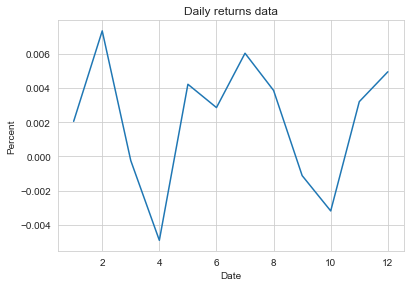

         Date        ARIMA        Close  RMSE_row_wise
0  2021-03-22  1303.003712  1370.800049      67.796337
1  2021-03-23  1305.673325  1371.550049      65.876724
2  2021-03-24  1315.254721  1353.750000      38.495279
3  2021-03-25  1314.927664  1333.800049      18.872385
4  2021-03-26  1308.472335  1336.199951      27.727616
5  2021-03-30  1313.989387  1385.300049      71.310662
6  2021-03-31  1317.737999  1368.050049      50.312049
7  2021-04-01  1325.684362  1385.199951      59.515589
8  2021-04-05  1330.794213  1409.900024      79.105812
9  2021-04-06  1329.296974  1411.050049      81.753075
10 2021-04-07  1325.055992  1430.199951     105.143959
11 2021-04-08  1329.295094  1439.849976     110.554882
12 2021-04-09  1335.869561  1441.050049     105.180488
BEFORE SORTING
[67.7963367145519, 65.87672394948368, 38.495279256993626, 18.872385320038802, 27.727615950905147, 71.31066226309235, 50.312049390292714, 59.515588919602806, 79.10581171081685, 81.75307457597, 105.14395935722177, 110

In [17]:
final_prediction("INFY", "Infosys stock whether to buy or sell stock?")

# ....................... THE END .......................